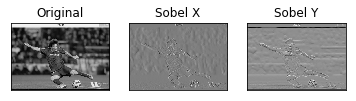

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv.imread('example.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)



win_size = (img.shape[1] // 8*8, img.shape[0] // 8*8)
block_size = (2*8, 2*8)
block_stride = (8,8)
cell_size = (8,8)
nbins = 9

hog = cv.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)

n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])

#hog_feats = hog.compute(img).reshape(n_cells[1] - 2, )

sblx = cv.Sobel(img, cv.CV_64F, 1,0,1)
sbly = cv.Sobel(img, cv.CV_64F, 0,1,1)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sblx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sbly,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

/home/654650/.local/lib/python3.5/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


NameError: name 'exposure' is not defined

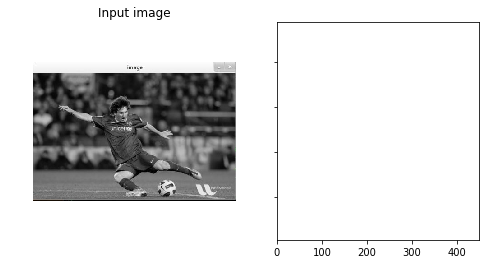

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import hog

%matplotlib inline
image = cv.imread('example.jpg')

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

